In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import os
import itertools

In [2]:
df = pd.read_feather('../input/ednet-kt34/KT3_merged.feather')
questions_df = pd.read_csv('../input/ednet-contents/questions.csv')

In [3]:
questions_df.head()

,question_id,bundle_id,explanation_id,correct_answer,part,tags,deployed_at
0,q1,b1,e1,b,1,1;2;179;181,1558093217098
1,q2,b2,e2,a,1,15;2;182,1558093219720
2,q3,b3,e3,b,1,14;2;179;183,1558093222784
3,q4,b4,e4,b,1,9;2;179;184,1558093225357
4,q5,b5,e5,c,1,8;2;179;181,1558093228439


In [4]:
df.head(20)

,timestamp,action_type,item_id,source,user_answer,platform,user_id
0,1565096151269,enter,b3544,diagnosis,,mobile,1
1,1565096187972,respond,q5012,diagnosis,b,mobile,1
2,1565096194904,submit,b3544,diagnosis,,mobile,1
3,1565096195001,enter,b3238,diagnosis,,mobile,1
4,1565096218682,respond,q4706,diagnosis,c,mobile,1
5,1565096223029,submit,b3238,diagnosis,,mobile,1
6,1565096223119,enter,b2898,diagnosis,,mobile,1
7,1565096290094,respond,q4366,diagnosis,b,mobile,1
8,1565096295925,submit,b2898,diagnosis,,mobile,1
9,1565096296012,enter,b3361,diagnosis,,mobile,1


In [5]:
# questions_df[['first_correct', 'avg_attempts', 'final_correct', 'time_spend']] = pd.DataFrame([[0, 0, 0, 0]], index=questions_df.index)

In [6]:
questions_df.head()

,question_id,bundle_id,explanation_id,correct_answer,part,tags,deployed_at
0,q1,b1,e1,b,1,1;2;179;181,1558093217098
1,q2,b2,e2,a,1,15;2;182,1558093219720
2,q3,b3,e3,b,1,14;2;179;183,1558093222784
3,q4,b4,e4,b,1,9;2;179;184,1558093225357
4,q5,b5,e5,c,1,8;2;179;181,1558093228439


In [7]:
df['action_type'].unique()

array(['enter', 'respond', 'submit', 'quit'], dtype=object)

In [8]:
df[df['action_type']=='respond']['source'].unique()

array(['diagnosis', 'sprint', 'adaptive_offer', 'tutor', 'review_quiz',
       'my_note', 'review'], dtype=object)

In [9]:
answers_dict = {q: questions_df[questions_df['question_id']==q]['correct_answer'].to_numpy()[0]
               for q in questions_df['question_id']}

In [10]:
df_respond = df[df['action_type']=='respond']

In [11]:
df_respond['correct_answer'] = df_respond['item_id'].map(answers_dict)
df_respond['is_correct'] = np.where(df_respond['correct_answer']==df_respond['user_answer'], 1, 0)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
df_respond.head()

,timestamp,action_type,item_id,source,user_answer,platform,user_id,correct_answer,is_correct
1,1565096187972,respond,q5012,diagnosis,b,mobile,1,c,0
4,1565096218682,respond,q4706,diagnosis,c,mobile,1,c,1
7,1565096290094,respond,q4366,diagnosis,b,mobile,1,b,1
10,1565096337361,respond,q4829,diagnosis,a,mobile,1,c,0
13,1565096395328,respond,q6528,diagnosis,b,mobile,1,d,0


In [13]:
del answers_dict

## Final correct respond

In [14]:
df_final_respond = df_respond.drop_duplicates(subset=['user_id', 'item_id'], keep='last')
print(df_respond.shape, df_final_respond.shape)

(23384480, 9) (16018708, 9)


<AxesSubplot:xlabel='is_correct', ylabel='count'>

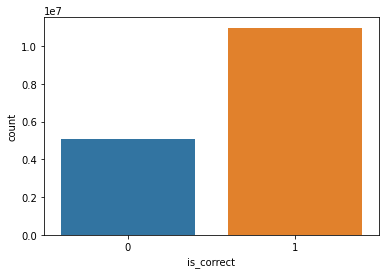

In [15]:
sns.countplot(x='is_correct', data=df_final_respond)

In [16]:
df_final_correct = df_final_respond[df_final_respond['is_correct']==1]

In [17]:
questions_df['final_correct'] = questions_df['question_id'].map(df_final_correct['item_id'].value_counts())

In [18]:
questions_df.head()

,question_id,bundle_id,explanation_id,correct_answer,part,tags,deployed_at,final_correct
0,q1,b1,e1,b,1,1;2;179;181,1558093217098,1363.0
1,q2,b2,e2,a,1,15;2;182,1558093219720,1251.0
2,q3,b3,e3,b,1,14;2;179;183,1558093222784,7179.0
3,q4,b4,e4,b,1,9;2;179;184,1558093225357,3709.0
4,q5,b5,e5,c,1,8;2;179;181,1558093228439,2245.0


## No. of users trying each question

In [19]:
users_per_question = df_respond.groupby('item_id')['user_id'].unique().apply(lambda x: len(x))
users_per_question.head()

item_id
q1        1530
q10       7964
q100      2155
q1000     6340
q10000     828
Name: user_id, dtype: int64

In [20]:
questions_df['num_users'] = questions_df['question_id'].map(users_per_question)

In [21]:
questions_df.head()

,question_id,bundle_id,explanation_id,correct_answer,part,tags,deployed_at,final_correct,num_users
0,q1,b1,e1,b,1,1;2;179;181,1558093217098,1363.0,1530.0
1,q2,b2,e2,a,1,15;2;182,1558093219720,1251.0,1437.0
2,q3,b3,e3,b,1,14;2;179;183,1558093222784,7179.0,12727.0
3,q4,b4,e4,b,1,9;2;179;184,1558093225357,3709.0,4738.0
4,q5,b5,e5,c,1,8;2;179;181,1558093228439,2245.0,3317.0


## Percentage of correct attempts

In [22]:
questions_df['pct_correct'] = questions_df['final_correct'] / questions_df['num_users']
questions_df.head()

,question_id,bundle_id,explanation_id,correct_answer,part,tags,deployed_at,final_correct,num_users,pct_correct
0,q1,b1,e1,b,1,1;2;179;181,1558093217098,1363.0,1530.0,0.890850
1,q2,b2,e2,a,1,15;2;182,1558093219720,1251.0,1437.0,0.870564
2,q3,b3,e3,b,1,14;2;179;183,1558093222784,7179.0,12727.0,0.564076
3,q4,b4,e4,b,1,9;2;179;184,1558093225357,3709.0,4738.0,0.782820
4,q5,b5,e5,c,1,8;2;179;181,1558093228439,2245.0,3317.0,0.676816


## Avg no. of attempts

In [23]:
question_total_attempts = df_respond['item_id'].value_counts()

In [24]:
questions_df['avg_attempts'] = questions_df['question_id'].map(question_total_attempts / users_per_question)

In [25]:
del question_total_attempts

In [26]:
questions_df.head()

,question_id,bundle_id,explanation_id,correct_answer,part,tags,deployed_at,final_correct,num_users,pct_correct,avg_attempts
0,q1,b1,e1,b,1,1;2;179;181,1558093217098,1363.0,1530.0,0.890850,1.272549
1,q2,b2,e2,a,1,15;2;182,1558093219720,1251.0,1437.0,0.870564,1.231733
2,q3,b3,e3,b,1,14;2;179;183,1558093222784,7179.0,12727.0,0.564076,1.321835
3,q4,b4,e4,b,1,9;2;179;184,1558093225357,3709.0,4738.0,0.782820,1.359434
4,q5,b5,e5,c,1,8;2;179;181,1558093228439,2245.0,3317.0,0.676816,1.551100


## Percentage of correct at first time

In [27]:
gb = df_respond.groupby('item_id')['user_id'].value_counts()

In [28]:
gb

item_id  user_id
q1       18337      10
         382743     10
         5769        9
         8861        9
         532070      9
                    ..
q9999    802044      1
         806809      1
         811293      1
         821529      1
         830211      1
Name: user_id, Length: 16018708, dtype: int64

In [29]:
# questions that have only-one attempts
questions_with_one_att = gb[gb==1].reset_index(name='count')
questions_with_one_att

,item_id,user_id,count
0,q1,98,1
1,q1,126,1
2,q1,154,1
3,q1,185,1
4,q1,196,1
...,...,...,...
12251410,q9999,802044,1
12251411,q9999,806809,1
12251412,q9999,811293,1
12251413,q9999,821529,1


In [30]:
questions_with_one_att['item_id'].value_counts()

q11262    25453
q11259    25336
q11249    25080
q11261    25061
q11263    24830
          ...  
q7927        24
q50           1
q5107         1
q8664         1
q8159         1
Name: item_id, Length: 11555, dtype: int64

In [31]:
one_correct = pd.merge(questions_with_one_att, df_final_correct, on=['item_id', 'user_id'], how='inner')[['item_id', 'user_id']]
one_correct

,item_id,user_id
0,q1,98
1,q1,185
2,q1,196
3,q1,198
4,q1,218
...,...,...
8364722,q9999,802044
8364723,q9999,806809
8364724,q9999,811293
8364725,q9999,821529


In [32]:
questions_df['correct_at_first'] = questions_df['question_id'].map(one_correct['item_id'].value_counts() / users_per_question)

In [33]:
questions_df.head(10)

,question_id,bundle_id,explanation_id,correct_answer,part,tags,deployed_at,final_correct,num_users,pct_correct,avg_attempts,correct_at_first
0,q1,b1,e1,b,1,1;2;179;181,1558093217098,1363.0,1530.0,0.890850,1.272549,0.735294
1,q2,b2,e2,a,1,15;2;182,1558093219720,1251.0,1437.0,0.870564,1.231733,0.730689
2,q3,b3,e3,b,1,14;2;179;183,1558093222784,7179.0,12727.0,0.564076,1.321835,0.433488
3,q4,b4,e4,b,1,9;2;179;184,1558093225357,3709.0,4738.0,0.782820,1.359434,0.619882
4,q5,b5,e5,c,1,8;2;179;181,1558093228439,2245.0,3317.0,0.676816,1.551100,0.462466
5,q6,b6,e6,d,1,9;2;179;182,1558093231307,1575.0,1864.0,0.844957,1.313305,0.675429
6,q7,b7,e7,d,1,11;7;179;183,1558093233992,5044.0,9447.0,0.533926,1.467132,0.299778
7,q8,b8,e8,b,1,20;21;179;184,1558093236876,2812.0,3183.0,0.883443,1.333648,0.688658
8,q9,b9,e9,c,1,13;2;179;183,1558093239849,1564.0,1757.0,0.890154,1.198065,0.770063
9,q10,b10,e10,c,1,17;7;182,1558093243018,2940.0,7964.0,0.369161,1.525113,0.172024


In [34]:
del one_correct, questions_with_one_att, df_final_correct, df_final_respond, gb, users_per_question

## Basic analysis

Correlation

<AxesSubplot:>

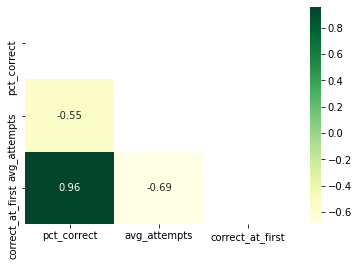

In [35]:
corr = questions_df[['pct_correct', 'avg_attempts', 'correct_at_first']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap='YlGn', annot=True)

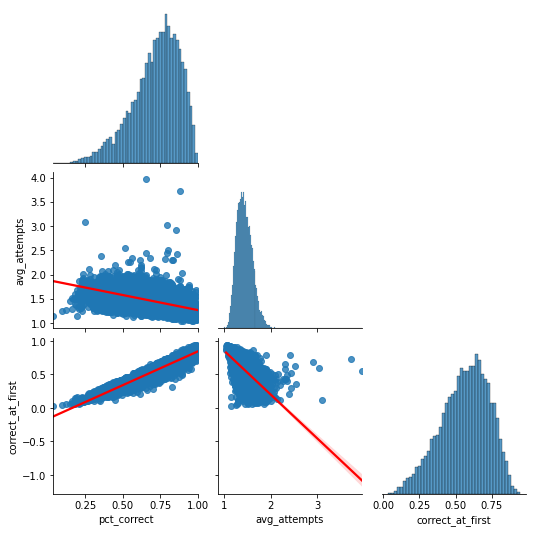

In [36]:
sns.pairplot(questions_df[['pct_correct', 'avg_attempts', 'correct_at_first']], kind='reg', plot_kws={'line_kws':{'color':'red'}}, corner=True)

## Tags

In [37]:
tags = set(itertools.chain.from_iterable(questions_df['tags'].str.split(';')))
print(tags)

{'125', '160', '120', '104', '85', '181', '168', '24', '102', '50', '164', '118', '88', '65', '62', '4', '89', '56', '7', '123', '177', '163', '172', '126', '180', '91', '25', '96', '171', '152', '15', '175', '68', '114', '107', '6', '122', '86', '133', '-1', '73', '44', '134', '77', '70', '54', '137', '66', '82', '83', '150', '48', '185', '14', '179', '148', '2', '63', '40', '157', '144', '136', '97', '47', '186', '80', '94', '51', '158', '42', '149', '183', '79', '132', '146', '170', '135', '130', '176', '57', '34', '72', '39', '178', '67', '3', '300', '64', '109', '108', '174', '153', '55', '35', '115', '143', '12', '38', '138', '140', '99', '30', '16', '52', '53', '37', '196', '194', '184', '33', '27', '147', '117', '165', '22', '36', '11', '45', '111', '105', '151', '10', '20', '32', '81', '113', '110', '128', '43', '129', '112', '84', '124', '23', '21', '101', '161', '173', '155', '159', '31', '71', '121', '93', '75', '166', '26', '87', '98', '116', '131', '145', '19', '61', '1',

In [38]:
for tag in tags:
    if tag != '-1':
        questions_df[tag] = 0

In [39]:
def encode_tags(cols):
    tags = questions_df[questions_df['question_id']==cols['question_id']]['tags'].str.split(';').values[0]
    if tags[0] != '-1':
        for tag in tags:
            cols[tag] = 1
    return cols

In [40]:
questions_df = questions_df.apply(encode_tags, axis=1)

In [41]:
stats = {'tag': [], 'pct_correct': [], 'avg_attempts': [], 'correct_at_first': []}
for tag in tags:
    if tag != '-1':
        stats['tag'].append(tag)
        stats['pct_correct'].append(questions_df[questions_df[tag]==1]['pct_correct'].mean())
        stats['avg_attempts'].append(questions_df[questions_df[tag]==1]['avg_attempts'].mean())
        stats['correct_at_first'].append(questions_df[questions_df[tag]==1]['correct_at_first'].mean())
        
tags_df = pd.DataFrame(stats)
tags_df

,tag,pct_correct,avg_attempts,correct_at_first
0,125,0.586414,1.744949,0.399923
1,160,0.566948,1.515389,0.409175
2,120,0.773456,1.512182,0.593632
3,104,0.738278,1.453144,0.598339
4,85,0.636112,1.504551,0.485142
...,...,...,...,...
183,156,0.776648,1.372164,0.617315
184,167,0.763323,1.396992,0.589676
185,28,0.753037,1.374094,0.598374
186,58,0.721009,1.272382,0.589913


Percentage of correct answers

In [42]:
print('Highest pct of correct ans:\n', tags_df.loc[tags_df['pct_correct'].argmax()])
print()
print('Lowest pct of correct ans:\n', tags_df.loc[tags_df['pct_correct'].argmin()])

Highest pct of correct ans:
 tag                        9
pct_correct         0.879032
avg_attempts        1.298429
correct_at_first    0.712348
Name: 163, dtype: object

Lowest pct of correct ans:
 tag                       97
pct_correct         0.529137
avg_attempts        1.564123
correct_at_first    0.351679
Name: 61, dtype: object


Avg no. of attempts

In [43]:
print('Highest avg no. of attempts:\n', tags_df.loc[tags_df['avg_attempts'].argmax()])
print()
print('Lowest avg no. of attempts:\n', tags_df.loc[tags_df['avg_attempts'].argmin()])

Highest avg no. of attempts:
 tag                       62
pct_correct         0.733364
avg_attempts        1.779648
correct_at_first    0.533513
Name: 14, dtype: object

Lowest avg no. of attempts:
 tag                      169
pct_correct         0.667962
avg_attempts        1.239665
correct_at_first    0.554337
Name: 177, dtype: object


Answer correctly using one attempts

In [44]:
print('Highest pct of 1st correct attempt:\n', tags_df.loc[tags_df['correct_at_first'].argmax()])
print()
print('Lowest pct of 1st correct attempt:\n', tags_df.loc[tags_df['correct_at_first'].argmin()])

Highest pct of 1st correct attempt:
 tag                       12
pct_correct         0.869905
avg_attempts        1.290161
correct_at_first    0.715385
Name: 95, dtype: object

Lowest pct of 1st correct attempt:
 tag                       97
pct_correct         0.529137
avg_attempts        1.564123
correct_at_first    0.351679
Name: 61, dtype: object


## Write to file

In [45]:
questions_df.to_csv('question_features.csv', index=False)